In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
df.head()

/tmp/ipykernel_33/1171470108.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df.shape

(1017209, 9)

In [5]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df_test=pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
df_test.shape

(41088, 8)

In [8]:
df_store=pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_store.shape

(1115, 10)

# *are the promotions distributed similarly between these two groups?*

In [10]:
# Calculate the distribution of Promo in the training set
promo_train_dist = df['Promo'].value_counts(normalize=True)
promo2_train_dist = df_store['Promo2'].value_counts(normalize=True)

# Calculate the distribution of Promo in the test set
promo_test_dist = df_test['Promo'].value_counts(normalize=True)
promo2_test_dist = df_store['Promo2'].value_counts(normalize=True)

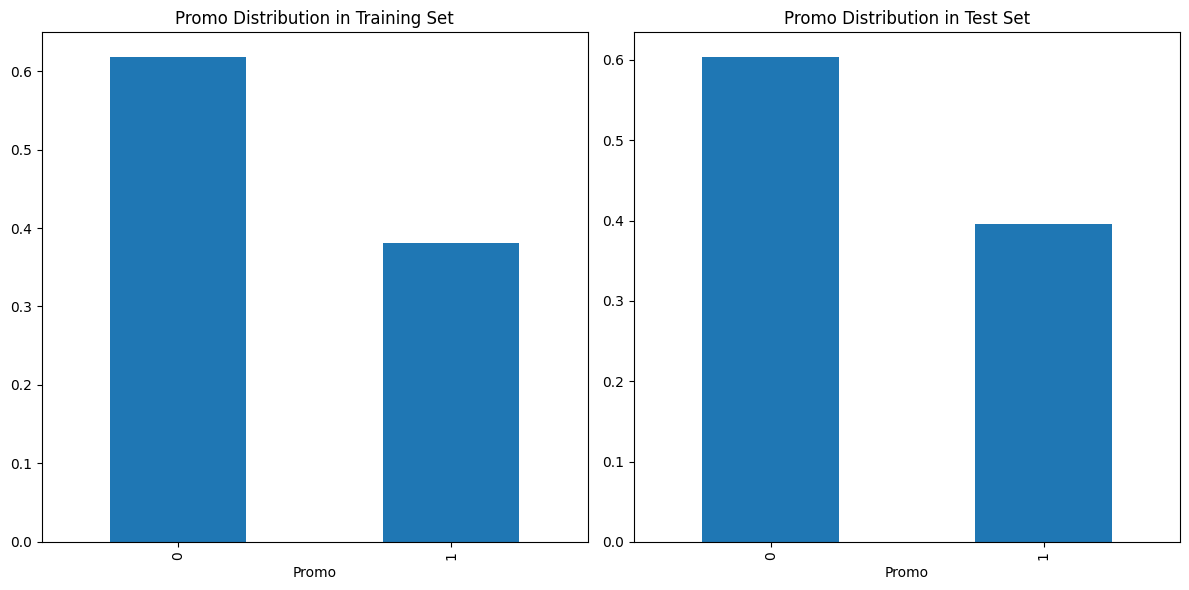

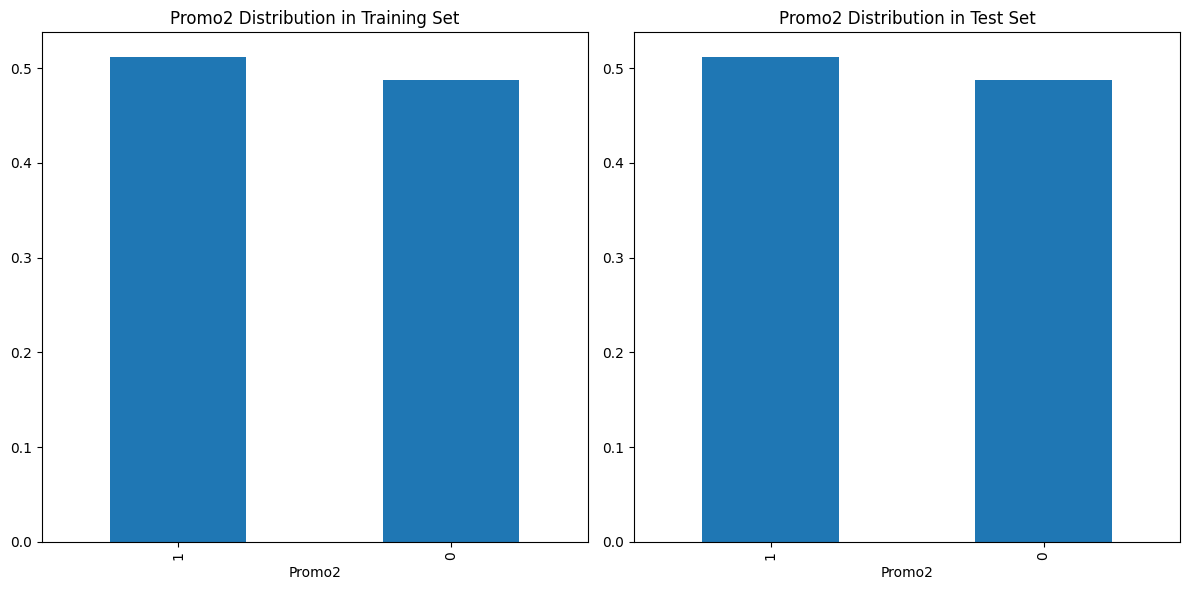

In [11]:
import matplotlib.pyplot as plt

# Create bar charts for Promo distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

promo_train_dist.plot(kind='bar', ax=axes[0], title='Promo Distribution in Training Set')
promo_test_dist.plot(kind='bar', ax=axes[1], title='Promo Distribution in Test Set')

plt.tight_layout()
plt.show()

# Create bar charts for Promo2 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

promo2_train_dist.plot(kind='bar', ax=axes[0], title='Promo2 Distribution in Training Set')
promo2_test_dist.plot(kind='bar', ax=axes[1], title='Promo2 Distribution in Test Set')

plt.tight_layout()
plt.show()


# Check & compare sales behavior before, during, and after holidays

In [12]:
import seaborn as sns

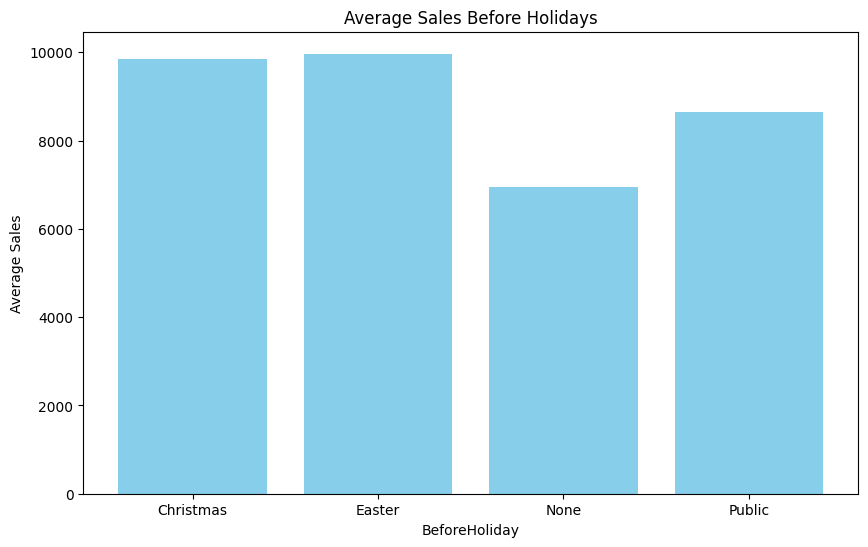

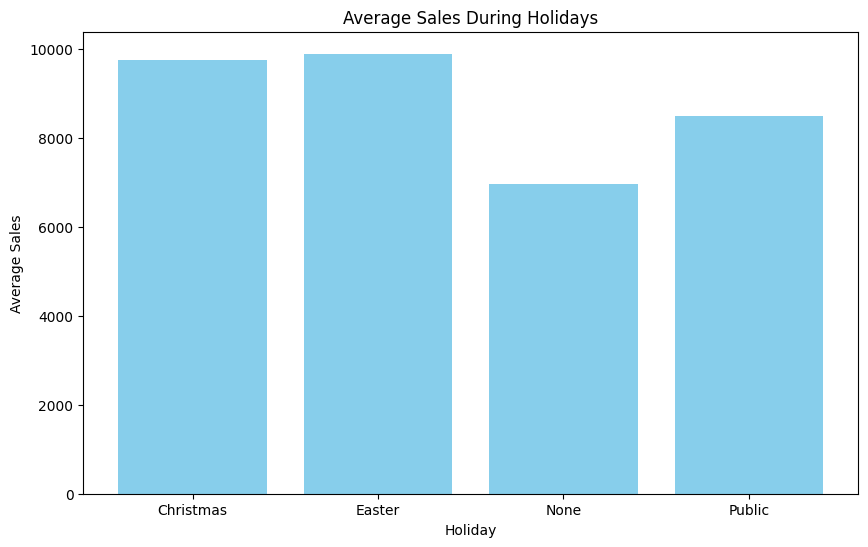

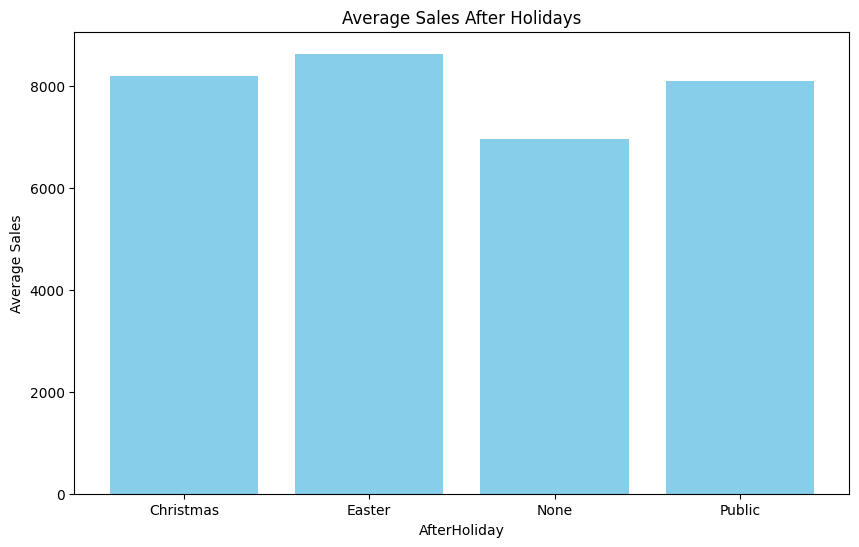

In [13]:
#Ensure we focus only on open stores
df=  df[df['Open'] == 1]

# Create a new column to identify holiday periods
df['Holiday'] =  df['StateHoliday'].apply(lambda x: 'Public' if x == 'a' else 'Easter' if x == 'b' else 'Christmas' if x == 'c' else 'None')

# Helper function to create before and after holiday flags
def holiday_periods(df, days=7):
    df['BeforeHoliday'] = df['Holiday'].shift(-days).fillna('None')
    df['AfterHoliday'] = df['Holiday'].shift(days).fillna('None')
    return df

# Apply the function to create before and after holiday flags
df= holiday_periods( df)

# Function to plot sales behavior
def plot_sales_behavior(df, period, title):
    period_sales = df.groupby(period)['Sales'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(period_sales[period], period_sales['Sales'], color='skyblue')
    plt.title(title)
    plt.xlabel(period)
    plt.ylabel('Average Sales')
    plt.show()

# Plot sales behavior before holidays
plot_sales_behavior( df, 'BeforeHoliday', 'Average Sales Before Holidays')

# Plot sales behavior during holidays
plot_sales_behavior( df, 'Holiday', 'Average Sales During Holidays')

# Plot sales behavior after holidays
plot_sales_behavior( df, 'AfterHoliday', 'Average Sales After Holidays')

# Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

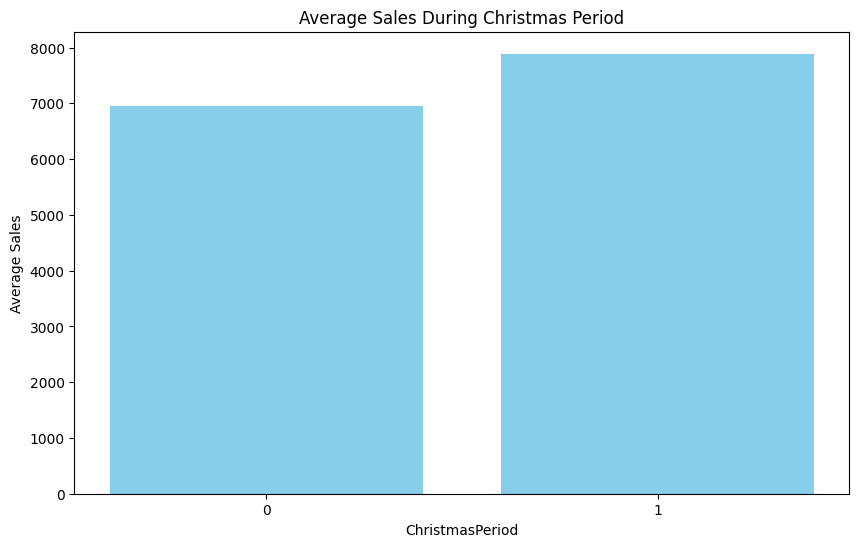

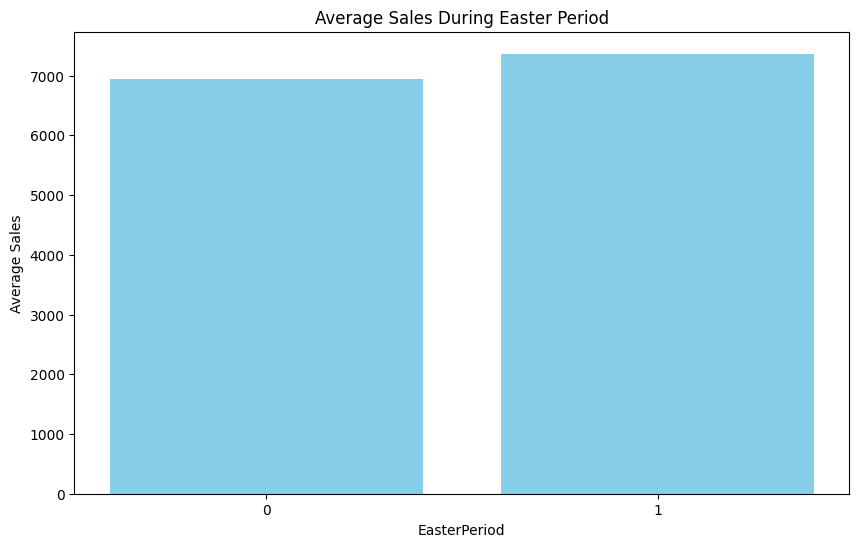

In [14]:
# Create a new column to identify holiday periods
df['Holiday'] = df['StateHoliday'].apply(lambda x: 'Public' if x == 'a' else 'Easter' if x == 'b' else 'Christmas' if x == 'c' else 'None')

# Define function to mark holiday periods
def mark_holiday_periods(df, holiday, start_date, end_date):
    df[holiday + 'Period'] = ((df['Date'] >= start_date) & (df['Date'] <= end_date)).astype(int)
    return df

# Mark Christmas period (for simplicity, assuming Christmas period is 20th December to 31st December)
train = mark_holiday_periods(df, 'Christmas', '2014-12-20', '2014-12-31')

# Mark Easter period (for simplicity, assuming Easter period is 1 week before and after Easter Sunday, e.g., 13th April 2014)
train = mark_holiday_periods(df, 'Easter', '2014-04-06', '2014-04-20')

# Function to plot sales behavior
def plot_seasonal_behavior(df, period_column, title):
    period_sales = df.groupby(period_column)['Sales'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(period_sales[period_column].astype(str), period_sales['Sales'], color='skyblue')
    plt.title(title)
    plt.xlabel(period_column)
    plt.ylabel('Average Sales')
    plt.show()

# Plot sales behavior around Christmas
plot_seasonal_behavior(train, 'ChristmasPeriod', 'Average Sales During Christmas Period')

# Plot sales behavior around Easter
plot_seasonal_behavior(train, 'EasterPeriod', 'Average Sales During Easter Period')

#  correlation between sales and the number of customers?


In [15]:
corr_col=['Sales', 'Customers']

Text(0.5, 1.0, 'correlation matrix')

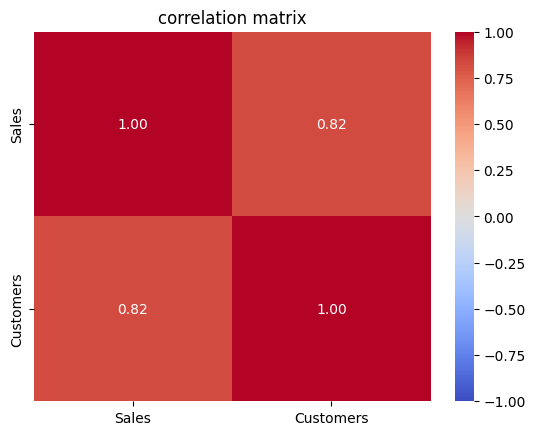

In [16]:
sns.heatmap(df[corr_col].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('correlation matrix')

# How does promo affect sales Are the promos attracting more customers? How does it affect already existing customers?

<Axes: >

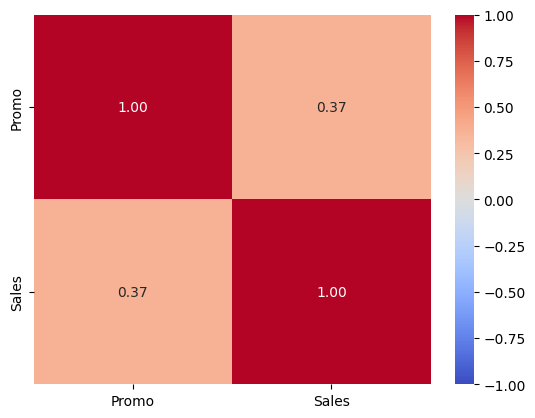

In [17]:
corr_col2=['Promo', 'Sales']
sns.heatmap(df[corr_col2].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

/tmp/ipykernel_33/4190290361.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv', parse_dates=['Date'])
/tmp/ipykernel_33/4190290361.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['StateHoliday'] = train['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})


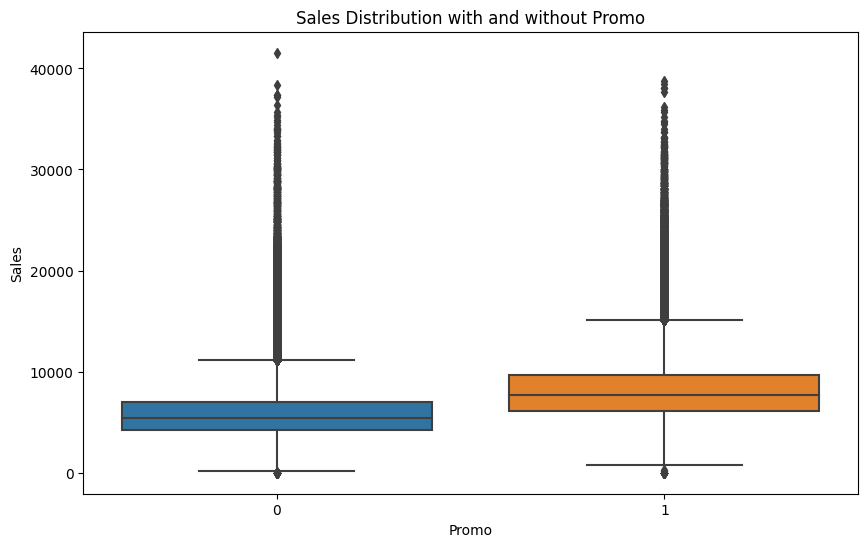

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [18]:
# Load the dataset
train = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv', parse_dates=['Date'])

# Ensure we focus only on open stores
train = train[train['Open'] == 1]

# Preprocess the data
# Convert categorical variables into numerical values using label encoding
train['StateHoliday'] = train['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
df_store['StoreType'] = df_store['StoreType'].astype('category').cat.codes
df_store['Assortment'] = df_store['Assortment'].astype('category').cat.codes

# Function to plot sales distribution
def plot_sales_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Promo', y='Sales')
    plt.title(title)
    plt.xlabel('Promo')
    plt.ylabel('Sales')
    plt.show()

# Overall sales distribution with and without promo
plot_sales_distribution(train, 'Sales Distribution with and without Promo')

# Segment the data by StoreType and Assortment
store_segments = df_store.groupby(['StoreType', 'Assortment'])

# Analyze promo impact for each segment
segment_analysis = store_segments['Sales', 'Promo'].agg(['mean', 'count'])
print(segment_analysis)

# Function to evaluate promo effectiveness by segment
def evaluate_promo_effectiveness(segment):
    promo_effectiveness = {}
    for name, group in segment:
        with_promo = group[group['Promo'] == 1]['Sales']
        without_promo = group[group['Promo'] == 0]['Sales']
        effectiveness = with_promo.mean() - without_promo.mean()
        promo_effectiveness[name] = effectiveness
    return promo_effectiveness

# Evaluate promo effectiveness for each segment
promo_effectiveness = evaluate_promo_effectiveness(store_segments)
print(promo_effectiveness)

# Identify which stores should have promotions
effective_segments = {k: v for k, v in promo_effectiveness.items() if v > 0}
print("Effective segments for promos:", effective_segments)

# Further analyze effective segments
for segment in effective_segments.keys():
    segment_data = train[(train['StoreType'] == segment[0]) & (train['Assortment'] == segment[1])]
    plot_sales_distribution(segment_data, f'Sales Distribution for StoreType {segment[0]} and Assortment {segment[1]}')



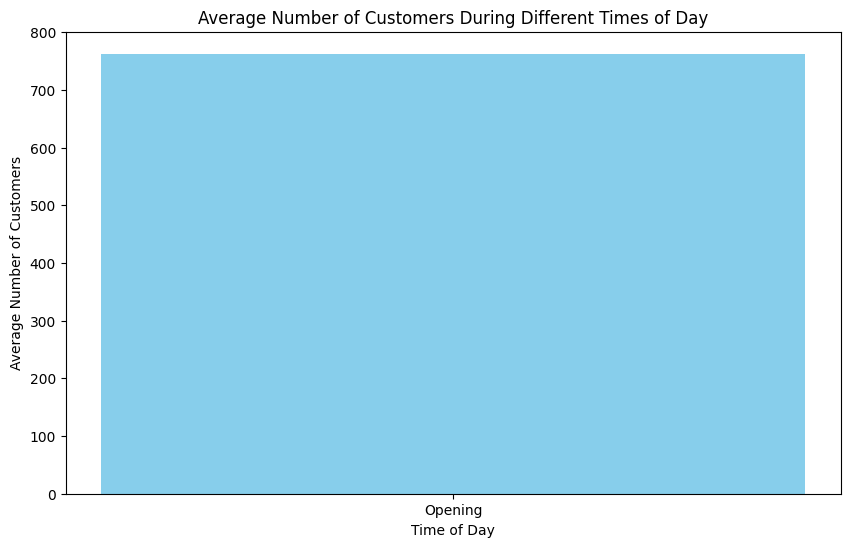

In [19]:



# Ensure we focus only on open stores
train = train[train['Open'] == 1]

# Extract the hour from the Date (assuming the Date includes time)
# For this example, we'll simulate the opening and closing times
# Note: Your dataset might need additional columns to accurately reflect this information
train['Hour'] = train['Date'].dt.hour

# Define opening and closing times (assuming 8 AM to 8 PM for simplicity)
train['OpenTime'] = 8
train['CloseTime'] = 20

# Create a column to indicate whether the record is during opening or closing times
train['TimeOfDay'] = train['Hour'].apply(lambda x: 'Opening' if x < 10 else 'Closing' if x > 18 else 'Middle')

# Aggregate customer data by time of day
time_of_day_sales = train.groupby('TimeOfDay')['Customers'].mean().reset_index()

# Plot customer behavior during opening and closing times
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_sales['TimeOfDay'], time_of_day_sales['Customers'], color=['skyblue', 'lightgreen', 'coral'])
plt.title('Average Number of Customers During Different Times of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Customers')
plt.show()


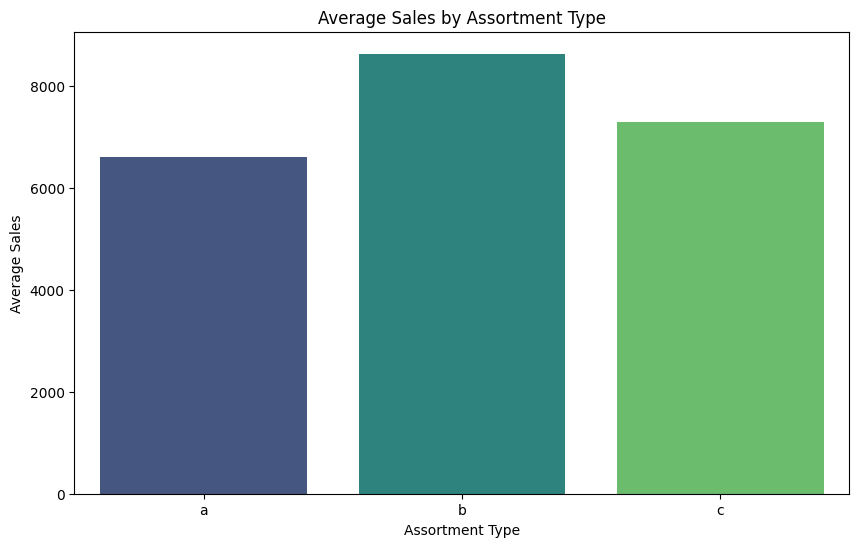

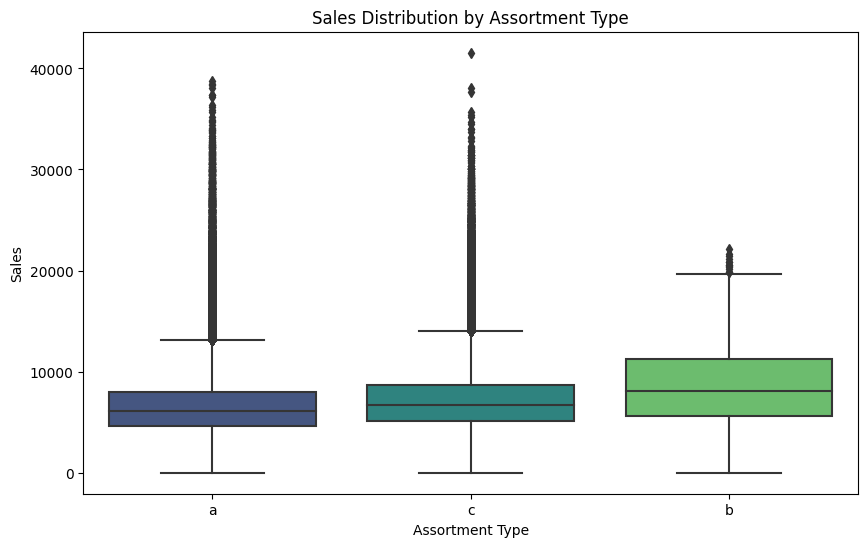

In [20]:
# Ensure we focus only on open stores
train = train[train['Open'] == 1]

# Preprocess the data
# Convert categorical variables into numerical values if necessary
train['StateHoliday'] = train['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
df_store['StoreType'] = df_store['StoreType'].astype('category').cat.codes
df_store['Assortment'] = df_store['Assortment'].astype('category').cat.codes

# Map assortment codes back to labels for clarity in plots
assortment_map = {0: 'a', 1: 'b', 2: 'c'}
df_store['Assortment'] = df_store['Assortment'].map(assortment_map)
data = pd.merge(train, df_store, on='Store')

# Analyze average sales by assortment type
assortment_sales = data.groupby('Assortment')['Sales'].mean().reset_index()

# Plot average sales by assortment type
plt.figure(figsize=(10, 6))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', palette='viridis')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()

# Boxplot for sales distribution by assortment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Assortment', y='Sales', palette='viridis')
plt.title('Sales Distribution by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()

/tmp/ipykernel_33/2297329148.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionDistance'].fillna(data['CompetitionDistance'].max() + 1, inplace=True)
/tmp/ipykernel_33/2297329148.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_sales = data.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()
/o

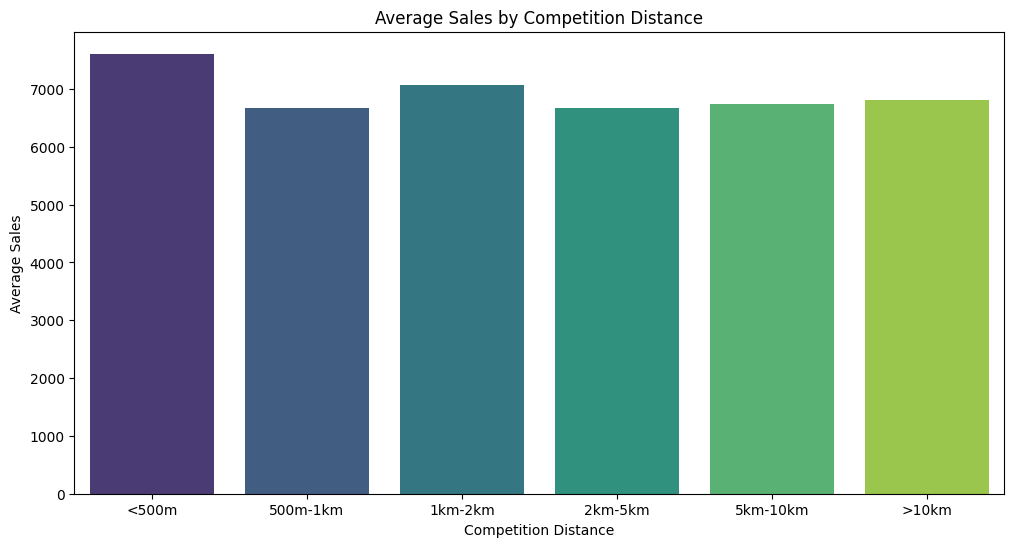

/tmp/ipykernel_33/2297329148.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_center_distance_sales = city_center_stores.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


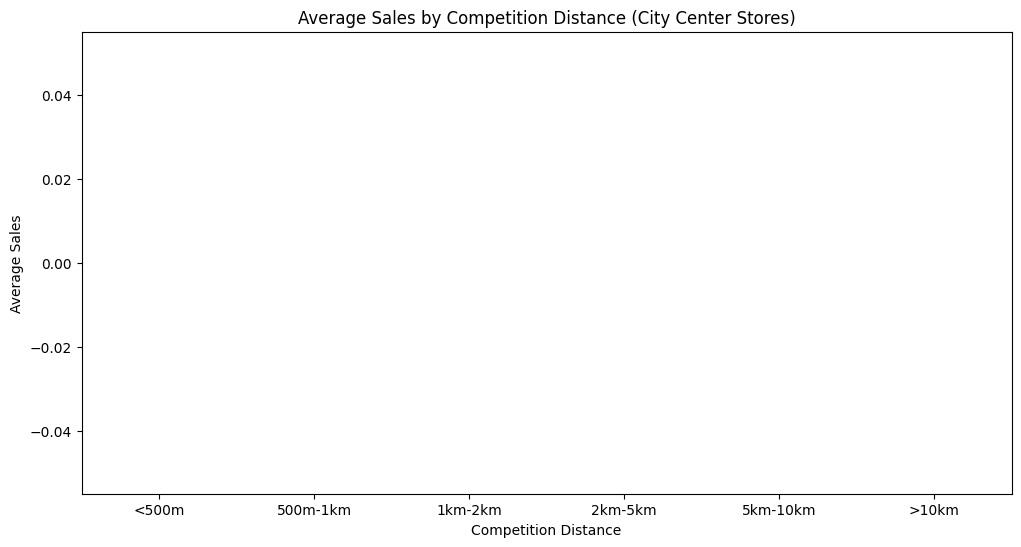

/tmp/ipykernel_33/2297329148.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_city_center_distance_sales = non_city_center_stores.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


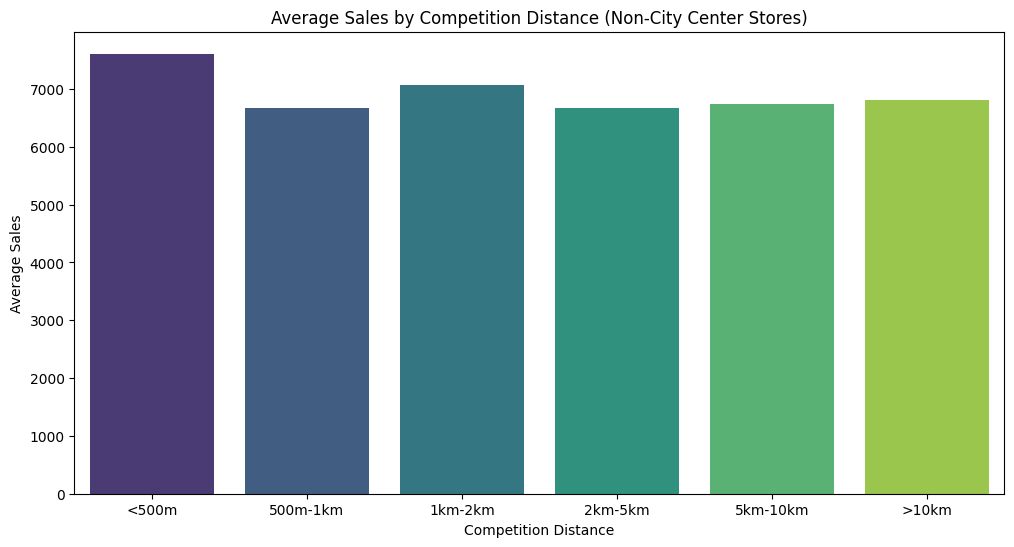

In [21]:
data = pd.merge(train, df_store, on='Store')

# Ensure we focus only on open stores
data = data[data['Open'] == 1]

# Preprocess the data
data['StateHoliday'] = data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})

# Fill missing CompetitionDistance with a large value
data['CompetitionDistance'].fillna(data['CompetitionDistance'].max() + 1, inplace=True)

# Analyze sales by competition distance
# Create distance bins
bins = [0, 500, 1000, 2000, 5000, 10000, np.inf]
labels = ['<500m', '500m-1km', '1km-2km', '2km-5km', '5km-10km', '>10km']
data['CompetitionDistanceBin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average sales for each distance bin
distance_sales = data.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()

# Plot average sales by competition distance bin
plt.figure(figsize=(12, 6))
sns.barplot(data=distance_sales, x='CompetitionDistanceBin', y='Sales', palette='viridis')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

# Analyze the impact of city centers
# Assume city centers have high population density, might use City as a proxy if available
# For the sake of this example, let's assume stores in city centers have StoreType 'a' or 'b'
city_center_stores = data[data['StoreType'].isin(['a', 'b'])]

# Calculate average sales by competition distance bin for city center stores
city_center_distance_sales = city_center_stores.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()

# Plot average sales by competition distance bin for city center stores
plt.figure(figsize=(12, 6))
sns.barplot(data=city_center_distance_sales, x='CompetitionDistanceBin', y='Sales', palette='viridis')
plt.title('Average Sales by Competition Distance (City Center Stores)')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

# Compare with non-city center stores
non_city_center_stores = data[~data['StoreType'].isin(['a', 'b'])]

# Calculate average sales by competition distance bin for non-city center stores
non_city_center_distance_sales = non_city_center_stores.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()

# Plot average sales by competition distance bin for non-city center stores
plt.figure(figsize=(12, 6))
sns.barplot(data=non_city_center_distance_sales, x='CompetitionDistanceBin', y='Sales', palette='viridis')
plt.title('Average Sales by Competition Distance (Non-City Center Stores)')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

/tmp/ipykernel_33/3719691311.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionDistance'].fillna(data['CompetitionDistance'].max() + 1, inplace=True)
/tmp/ipykernel_33/3719691311.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence t

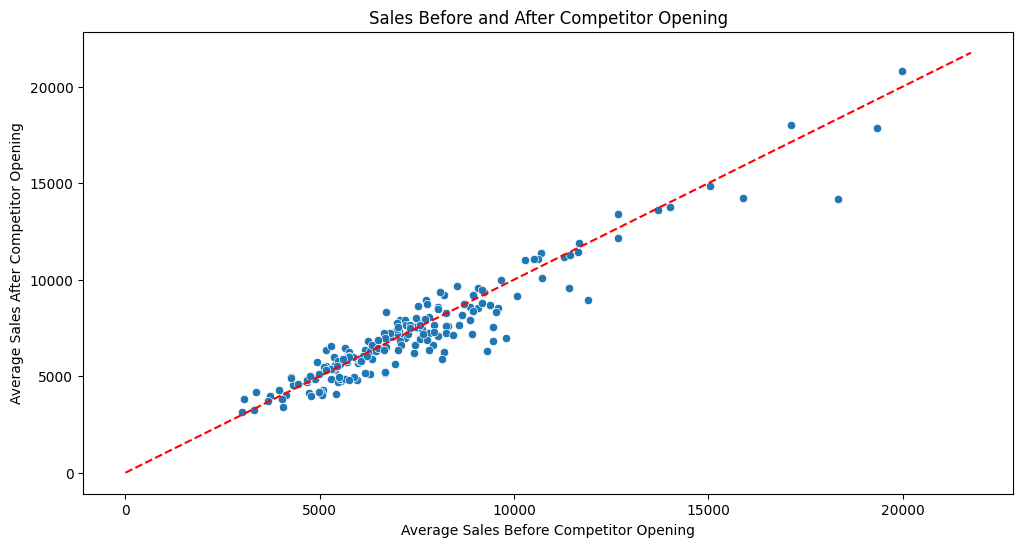

In [22]:

import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the dataset
logging.info("Loading datasets...")

# Merge train and store data
logging.info("Merging train and store data...")
data = pd.merge(train, df_store, on='Store')

# Ensure we focus only on open stores
logging.info("Filtering for open stores...")
data = data[data['Open'] == 1]

# Preprocess the data
logging.info("Preprocessing the data...")
data['StateHoliday'] = data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})

# Fill missing CompetitionDistance with a large value
logging.info("Filling missing CompetitionDistance values...")
data['CompetitionDistance'].fillna(data['CompetitionDistance'].max() + 1, inplace=True)

# Create a flag for the presence of competition
logging.info("Creating competition flag...")
data['HasCompetition'] = data['CompetitionDistance'] != (data['CompetitionDistance'].max() + 1)

# Function to extract month and year from Date
def get_month_year(date):
    return date.year, date.month

# Add month and year columns to data
logging.info("Adding Year and Month columns...")
data['Year'], data['Month'] = zip(*data['Date'].apply(get_month_year))

# Check for each store when the competitor opened
logging.info("Determining competition open status...")
data['CompetitionOpen'] = data.apply(lambda row: (row['Year'] > row['CompetitionOpenSinceYear']) or 
                                     (row['Year'] == row['CompetitionOpenSinceYear'] and row['Month'] >= row['CompetitionOpenSinceMonth']), axis=1)

# Filter out rows where CompetitionOpenSinceYear or CompetitionOpenSinceMonth is NA
logging.info("Filtering out rows with NA CompetitionOpenSinceYear or CompetitionOpenSinceMonth...")
data = data.dropna(subset=['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'])

# Analyze sales before and after competitor opening for each store
logging.info("Analyzing sales before and after competitor opening...")
def competitor_impact(store_data):
    pre_competition = store_data[store_data['CompetitionOpen'] == False]['Sales']
    post_competition = store_data[store_data['CompetitionOpen'] == True]['Sales']
    return pd.Series({'PreCompetitionSales': pre_competition.mean(), 'PostCompetitionSales': post_competition.mean()})

store_impact = data.groupby('Store').apply(competitor_impact).reset_index()

# Plot the sales before and after competitor opening
logging.info("Plotting sales data...")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=store_impact, x='PreCompetitionSales', y='PostCompetitionSales')
plt.title('Sales Before and After Competitor Opening')
plt.xlabel('Average Sales Before Competitor Opening')
plt.ylabel('Average Sales After Competitor Opening')
plt.plot([0, max(store_impact['PreCompetitionSales'].max(), store_impact['PostCompetitionSales'].max())], 
         [0, max(store_impact['PreCompetitionSales'].max(), store_impact['PostCompetitionSales'].max())], 'r--')
plt.show()

logging.info("Analysis complete.")
